In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
path = "C:/users/samhr/classwork/Group Project 1/Group Project 1 Data/Texas Voting Data/1976-2018-house.csv"
df = pd.read_csv(path, encoding = "ISO-8859-1")
df = df.set_index("state")
df = df.loc["Texas"]


In [3]:
df.dtypes

year                int64
state_po           object
state_fips          int64
state_cen           int64
state_ic            int64
office             object
district            int64
stage              object
runoff             object
special              bool
candidate          object
party              object
writein              bool
mode               object
candidatevotes     object
totalvotes        float64
unofficial           bool
version             int64
dtype: object

In [4]:
df["candidatevotes"] = df["candidatevotes"].astype("int")
df["vote_cap"] = df["candidatevotes"]/df["totalvotes"]*100


In [5]:
df = df.assign(id=df["year"].astype("str") + df["candidate"])
year_total_votes = df.groupby("year")['candidatevotes'].sum()
year_party_votes = df.groupby(["year", "party"])["candidatevotes"].sum()

party_vote_cap = year_party_votes/year_total_votes *100
party_vote_cap_df = pd.DataFrame(party_vote_cap)
party_vote_cap_df = party_vote_cap_df.reset_index().set_index("party")
party_vote_cap_df = party_vote_cap_df.loc[["democrat", "republican"], :]
vote_cap_df = party_vote_cap_df.reset_index().set_index('year')

dem_vote_cap_df = vote_cap_df[vote_cap_df["party"] == 'democrat'].reset_index()
rep_vote_cap_df = vote_cap_df[vote_cap_df["party"] != 'democrat'].reset_index()




In [6]:
df = df[~df["stage"].isna()].set_index("id")


In [7]:
df.dtypes

year                int64
state_po           object
state_fips          int64
state_cen           int64
state_ic            int64
office             object
district            int64
stage              object
runoff             object
special              bool
candidate          object
party              object
writein              bool
mode               object
candidatevotes      int32
totalvotes        float64
unofficial           bool
version             int64
vote_cap          float64
dtype: object

In [8]:
winners = df.groupby(['year', 'district'])["candidatevotes"].idxmax().values

In [9]:
voting_df = df.loc[winners]
voting_df

,year,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,vote_cap
id,,,,,,,,,,,,,,,,,,,
"1976Sam B. Hall, Jr.",1976,TX,48,74,49,US House,1,gen,False,False,"Sam B. Hall, Jr.",democrat,False,total,135384,161718.0,False,20171005,83.716098
1976Charles Wilson,1976,TX,48,74,49,US House,2,gen,False,False,Charles Wilson,democrat,False,total,133910,140902.0,False,20171005,95.037686
1976James M. Collins,1976,TX,48,74,49,US House,3,gen,False,False,James M. Collins,republican,False,total,171343,231413.0,False,20171005,74.042081
1976Ray Roberts,1976,TX,48,74,49,US House,4,gen,False,False,Ray Roberts,democrat,False,total,105394,168035.0,False,20171005,62.721457
1976Jim Mattox,1976,TX,48,74,49,US House,5,gen,False,False,Jim Mattox,democrat,False,total,67871,125768.0,False,20171005,53.965238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018Colin Allred,2018,TX,48,74,49,US House,32,gen,NaN,False,Colin Allred,democrat,False,total,144067,275620.0,False,20190110,52.270155
2018Marc Veasey,2018,TX,48,74,49,US House,33,gen,NaN,False,Marc Veasey,democrat,False,total,90805,119224.0,False,20190110,76.163356
2018Filemon B. Vela,2018,TX,48,74,49,US House,34,gen,NaN,False,Filemon B. Vela,democrat,False,total,85825,143068.0,False,20190110,59.988956


In [10]:
voting_df = voting_df.drop(["state_po", "state_fips", "state_cen", "state_ic", "office", "stage", "runoff", "special", "candidate", "writein", "mode", "unofficial", "version"], axis = 1)

In [11]:
voting_df["% of total votes"] = voting_df["candidatevotes"]/voting_df["totalvotes"]*100
voting_df

,year,district,party,candidatevotes,totalvotes,vote_cap,% of total votes
id,,,,,,,
"1976Sam B. Hall, Jr.",1976,1,democrat,135384,161718.0,83.716098,83.716098
1976Charles Wilson,1976,2,democrat,133910,140902.0,95.037686,95.037686
1976James M. Collins,1976,3,republican,171343,231413.0,74.042081,74.042081
1976Ray Roberts,1976,4,democrat,105394,168035.0,62.721457,62.721457
1976Jim Mattox,1976,5,democrat,67871,125768.0,53.965238,53.965238
...,...,...,...,...,...,...,...
2018Colin Allred,2018,32,democrat,144067,275620.0,52.270155,52.270155
2018Marc Veasey,2018,33,democrat,90805,119224.0,76.163356,76.163356
2018Filemon B. Vela,2018,34,democrat,85825,143068.0,59.988956,59.988956


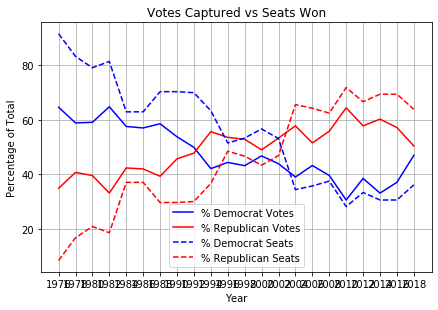

In [12]:
state_party_wins = voting_df.groupby("year")["party"].value_counts()

party_wins_df = pd.DataFrame(state_party_wins)

party_wins_df.columns = ["wins"]
party_wins_df = party_wins_df.reset_index()

dem_wins_df = party_wins_df[party_wins_df["party"] == 'democrat'].reset_index()
rep_wins_df = party_wins_df[party_wins_df["party"] != 'democrat'].reset_index()
dem_wins_df['% of seats'] = dem_wins_df['wins']/(rep_wins_df['wins']+dem_wins_df['wins'])*100

rep_wins_df['% of seats'] = rep_wins_df['wins']/(rep_wins_df['wins']+dem_wins_df['wins'])*100


fig, ax = plt.subplots()
ax.set_xticks(dem_vote_cap_df['year'])
ax.plot(dem_vote_cap_df['year'], dem_vote_cap_df["candidatevotes"], label='% Democrat Votes', color = 'b')
ax.plot(rep_vote_cap_df['year'], rep_vote_cap_df["candidatevotes"], label='% Republican Votes', color = 'r')



ax.plot(dem_wins_df["year"], dem_wins_df["% of seats"], '--b', label = '% Democrat Seats')
ax.plot(rep_wins_df["year"], rep_wins_df["% of seats"], '--r', label = '% Republican Seats')
# Add some text for labels, title and custom x-axis tick labels, etc.

ax.legend()
ax.grid(True)
plt.rcParams["figure.figsize"] = (12,8)
fig.tight_layout()
plt.xlabel("Year")
plt.ylabel("Percentage of Total")
plt.title("Votes Captured vs Seats Won")
plt.savefig("VotesVSSeats.png")

In [13]:
district_party_wins = voting_df.groupby(["year", "district"])["party"].value_counts()
district_wins_df = pd.DataFrame(district_party_wins)
district_wins_df = district_wins_df.rename(columns = {"party":"wins"}).reset_index()
district_wins_df.set_index("district")

,year,party,wins
district,,,
1,1976,democrat,1
2,1976,democrat,1
3,1976,republican,1
4,1976,democrat,1
5,1976,democrat,1
...,...,...,...
32,2018,democrat,1
33,2018,democrat,1
34,2018,democrat,1


In [14]:
dem_df = df.loc[df["party"]=="democrat"].set_index("year")
dem_df["% of total votes"] = dem_df["candidatevotes"]/dem_df["totalvotes"]
dem_vote_cap_yearly = dem_df.groupby(["year", "district"])["% of total votes"].mean()

rep_df = df.loc[df["party"]=="republican"]
rep_df["% of total votes"] = rep_df["candidatevotes"]/rep_df["totalvotes"]
rep_df = rep_df[["year", "district", "% of total votes"]]





C:\Users\samhr\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


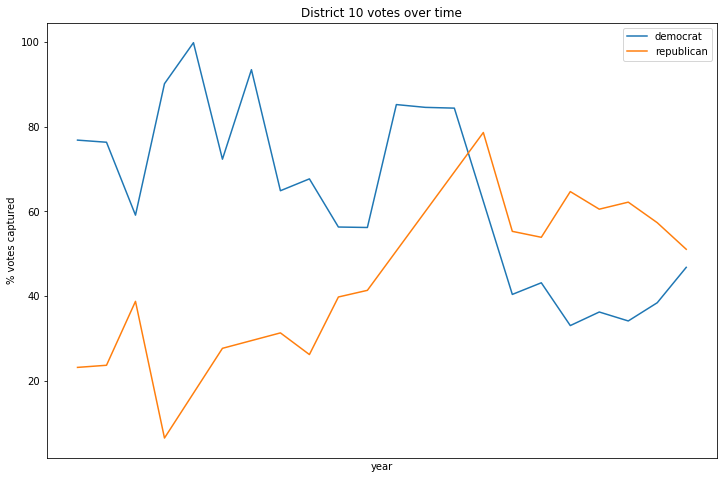

<Figure size 720x360 with 0 Axes>

In [15]:
district_10_df = df.loc[df["district"]==10]
district_10_dem_df = district_10_df.loc[district_10_df["party"]== "democrat"].set_index("year")
district_10_rep_df = district_10_df.loc[district_10_df["party"]== "republican"].set_index("year")

plt.xticks(district_10_dem_df['vote_cap'], district_10_dem_df.index.values)
plt.xticks(district_10_rep_df['vote_cap'], district_10_rep_df.index.values)
plt.plot(district_10_dem_df['vote_cap'])
plt.plot(district_10_rep_df['vote_cap'])
plt.title("District 10 votes over time")
plt.xlabel("year")
plt.ylabel("% votes captured")
plt.legend(["democrat", "republican"])
plt.show()
plt.figure(figsize = (10, 5))
plt.savefig("District_Votes.png")

In [16]:
path2 = "C:/users/samhr/classwork/Group Project 1/TotalDemographics.csv"
df_demo = pd.read_csv(path2, encoding = "ISO-8859-1")
df_demo = df_demo.drop(["Estimate; Hispanic or Latino: - American Indian and Alaska Native alone",
"Estimate; Hispanic or Latino: - Asian alone",
"Estimate; Hispanic or Latino: - Black or African American alone",
"Estimate; Hispanic or Latino: - Native Hawaiian and Other Pacific Islander alone",
"Estimate; Hispanic or Latino: - Some other race alone",
"Estimate; Hispanic or Latino: - Two or more races:",
"Estimate; Hispanic or Latino: - Two or more races: - Two races excluding Some other race, and three or more races", 
              "Estimate; Hispanic or Latino: - Two or more races: - Two races including Some other race",
"Estimate; Hispanic or Latino: - White alone",
"Estimate; Not Hispanic or Latino:",
       ], axis = 1)


In [17]:
state_df = df_demo.loc[df_demo["Districts"] == "Texas"]
state_df = state_df.set_index("Year")


state_df = state_df.drop(["Unnamed: 0", "Districts"], axis = 1)



In [18]:
old_headers = state_df.columns.tolist()
new_headers = ['Hispanic/Latino',
 'American Indian and Alaska Native ',
 'Asian',
 'Black or African American',
 'Native Hawaiian and Other Pacific Islander',
 'Some other race',
 'Two or more races',
 'Two or more races: - Two races excluding Some other race, and three or more races',
 'Two or more races: - with other',
 'White',
 'Total']

new_headers_dict = dict(zip(old_headers, new_headers))

state_df = state_df.rename(columns = new_headers_dict)



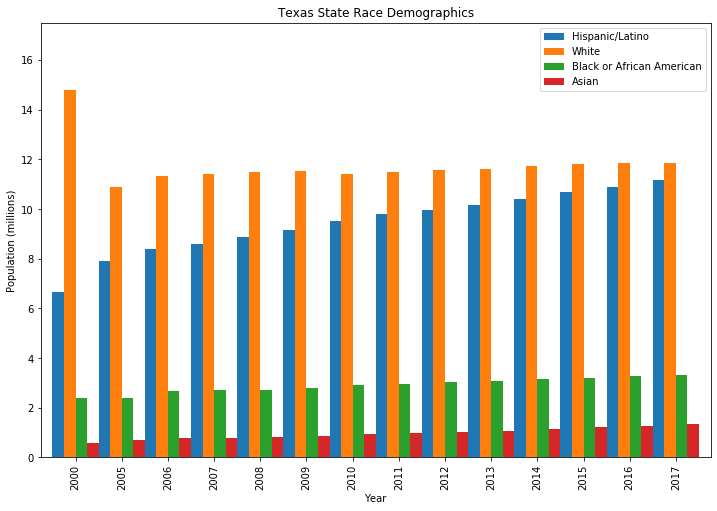

In [19]:

ax = state_df[["Hispanic/Latino", "White", "Black or African American", "Asian"]].plot(kind = "bar", width = 1)

ax.set_ylim(0, 17500000)
ax.set_yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000, 12000000, 14000000, 16000000])
ax.set_yticklabels([0, 2, 4, 6, 8, 10, 12, 14, 16])
ax.set_ylabel("Population (millions)")
ax.set_title("Texas State Race Demographics")
plt.savefig("StateDemographics.png")

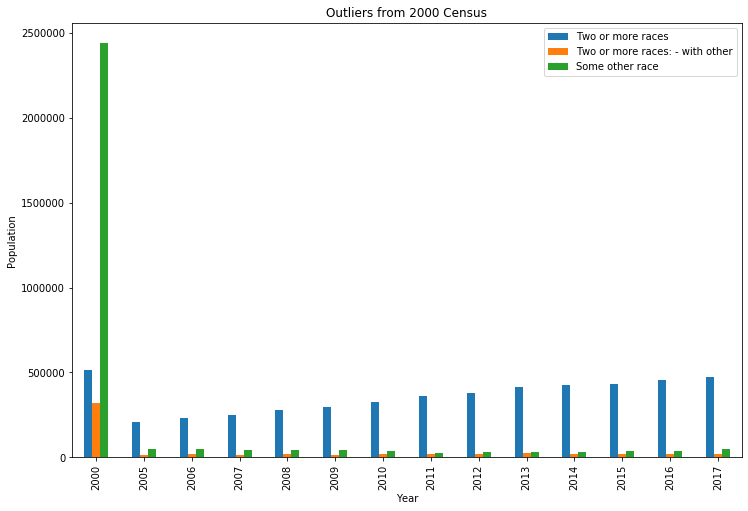

In [20]:
state_df[["Two or more races", "Two or more races: - with other", "Some other race"]].plot(kind = "bar")
plt.title("Outliers from 2000 Census")
plt.ylabel("Population")
plt.savefig("outliers.png")

In [21]:
path3 = "C:/users/samhr/classwork/Group Project 1/Group Project 1 Data/Texas Income Data/Texas County Income Data 2000-2018.csv"
df_income = pd.read_csv(path3, skiprows = 5)


In [22]:
state_df = df_income.loc[df_income["GeoName"] == "Texas"]
state_df = state_df.set_index("Description")
state_df = state_df.drop(["GeoName"], axis = 1)


In [23]:
income_df = df_income.loc[df["Description"] == "Per capita personal income (dollars) 2/"]
income_df = income_df.set_index("GeoName")

KeyError: 'Description'

In [ ]:
income_df = income_df.drop(["Description", "GeoFips", "LineCode"], axis = 1)


income_df

In [ ]:
income_change = income_df["2018"] - income_df["2000"]


In [ ]:
change_df = pd.DataFrame({"Change in per-Capita Income": income_change}).reset_index()
change_df = change_df.set_index("GeoName")

In [ ]:
highest_growth = change_df["Change in per-Capita Income"].nlargest(10)
lowest_growth = change_df["Change in per-Capita Income"].nsmallest(10)
state_growth = change_df["Change in per-Capita Income"].iloc(0)


income_change_max_df = pd.DataFrame({"Counties with Highest per-Capita Income Growth": highest_growth} 
                                 ).reset_index()
income_change_min_df = pd.DataFrame({"Counties with Lowest per-Capita Income Growth": lowest_growth}).reset_index()


In [ ]:
income_df = income_df.transpose()

In [ ]:

y = ["Shackelford, TX", 
     "Midland, TX", 
     "Glasscock, TX", 
     "Kendall, TX", 
     "Eastland, TX", 
    "Motley, TX", 
    "Terry, TX", 
    "Hale, TX", 
    "Loving, TX", 
    "Sherman, TX", 
    "Texas"]
income_df.plot(y=y, kind="line")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.ylabel("Income $")
plt.xlabel("Year")
plt.title("Highest and Lowest Growth Counties")
plt.figure(figsize = (10, 6))
plt.tight_layout()
plt.savefig("Min-Max_Income_Plot.png")